In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
!pip install matplotlib mplfinance
import mplfinance as mpf

Downloading Datasets

In [ ]:
stock = "^NSEI"
df = yf.download(stock,period="2y",interval="1h")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-06-20 10:15:00+05:30,15299.250000,15332.900391,15252.700195,15295.799805,15295.799805,0
2022-06-20 11:15:00+05:30,15294.549805,15358.299805,15275.599609,15330.200195,15330.200195,0
2022-06-20 12:15:00+05:30,15330.549805,15382.049805,15301.700195,15319.000000,15319.000000,0
2022-06-20 13:15:00+05:30,15319.299805,15324.750000,15263.599609,15301.299805,15301.299805,0
2022-06-20 14:15:00+05:30,15301.799805,15355.549805,15250.200195,15352.150391,15352.150391,0
...,...,...,...,...,...,...
2024-06-19 13:15:00+05:30,23552.099609,23571.500000,23513.500000,23560.650391,23560.650391,0
2024-06-19 14:15:00+05:30,23560.449219,23663.599609,23484.150391,23511.000000,23511.000000,0
2024-06-19 15:15:00+05:30,23509.800781,23528.449219,23504.599609,23521.400391,23521.400391,0


In [ ]:
# prompt: create a column difference of opening price and closing price
df['Difference'] = df['Open'] - df['Close']
df

,Open,High,Low,Close,Adj Close,Volume,Difference
Datetime,,,,,,,
2022-06-20 10:15:00+05:30,15299.250000,15332.900391,15252.700195,15295.799805,15295.799805,0,3.450195
2022-06-20 11:15:00+05:30,15294.549805,15358.299805,15275.599609,15330.200195,15330.200195,0,-35.650391
2022-06-20 12:15:00+05:30,15330.549805,15382.049805,15301.700195,15319.000000,15319.000000,0,11.549805
2022-06-20 13:15:00+05:30,15319.299805,15324.750000,15263.599609,15301.299805,15301.299805,0,18.000000
2022-06-20 14:15:00+05:30,15301.799805,15355.549805,15250.200195,15352.150391,15352.150391,0,-50.350586
...,...,...,...,...,...,...,...
2024-06-19 13:15:00+05:30,23552.099609,23571.500000,23513.500000,23560.650391,23560.650391,0,-8.550781
2024-06-19 14:15:00+05:30,23560.449219,23663.599609,23484.150391,23511.000000,23511.000000,0,49.449219
2024-06-19 15:15:00+05:30,23509.800781,23528.449219,23504.599609,23521.400391,23521.400391,0,-11.599609


Text(0.5, 1.0, 'Closing price of Nifty data')

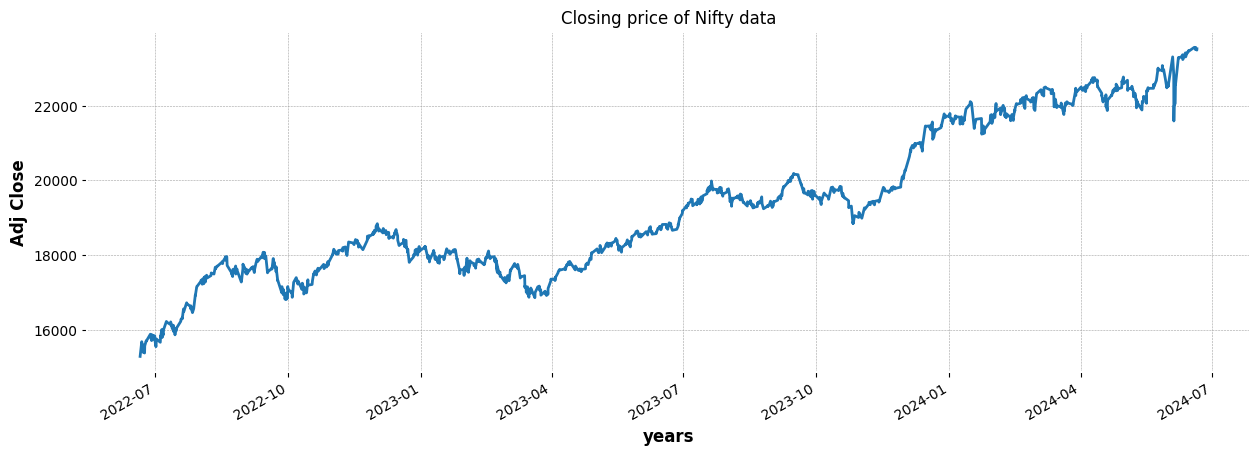

In [ ]:
plt.figure(figsize = (15,5))
df['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Nifty data")

In [ ]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [ ]:
Adj_close_price = df[['Close']]

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.        ],
       [0.00416142],
       [0.00280653],
       ...,
       [0.99505227],
       [0.99093314],
       [0.99513686]])

In [ ]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [ ]:
x_data[0],y_data[0]

(array([[0.        ],
        [0.00416142],
        [0.00280653],
        [0.00066534],
        [0.00681674],
        [0.00884299],
        [0.03155514],
        [0.03586163],
        [0.03492411],
        [0.04607758],
        [0.04755947],
        [0.04139601],
        [0.04093033],
        [0.01806082],
        [0.02319603],
        [0.02051047],
        [0.01512127],
        [0.01831493],
        [0.01498223],
        [0.01273813],
        [0.03594633],
        [0.0384443 ],
        [0.0287909 ],
        [0.01094178],
        [0.02462345],
        [0.03208131],
        [0.03408334],
        [0.04749898],
        [0.04664617],
        [0.04039199],
        [0.046507  ],
        [0.04973091],
        [0.05007562],
        [0.04876917],
        [0.06926759],
        [0.06960628],
        [0.06676951],
        [0.07173531],
        [0.07099141],
        [0.06529967],
        [0.06536016],
        [0.05111592],
        [0.05467852],
        [0.06066654],
        [0.05640234],
        [0

In [ ]:
splitting_len = int(len(x_data)*0.8)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2671, 100, 1)
(2671, 1)
(668, 100, 1)
(668, 1)


In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
2671/2671 [==============================] - 275s 101ms/step - loss: 5.1022e-04 - mean_absolute_error: 0.0155
Epoch 2/2
2671/2671 [==============================] - 268s 100ms/step - loss: 2.4743e-04 - mean_absolute_error: 0.0116


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 128)          66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
predictions = model.predict(x_test)

21/21 [==============================] - 2s 66ms/step


In [ ]:
predictions

array([[0.7114742 ],
       [0.71603096],
       [0.7295935 ],
       [0.7421143 ],
       [0.7498929 ],
       [0.7548552 ],
       [0.7572564 ],
       [0.75875854],
       [0.7594026 ],
       [0.76057684],
       [0.75709295],
       [0.75598174],
       [0.75427485],
       [0.75302273],
       [0.74531364],
       [0.7401623 ],
       [0.74209046],
       [0.74789786],
       [0.7552849 ],
       [0.7583161 ],
       [0.75840026],
       [0.7597162 ],
       [0.75942385],
       [0.76288885],
       [0.765487  ],
       [0.76430684],
       [0.7623498 ],
       [0.76066786],
       [0.75771075],
       [0.75645334],
       [0.76961625],
       [0.78282815],
       [0.7937567 ],
       [0.7872503 ],
       [0.7820412 ],
       [0.7771127 ],
       [0.77465665],
       [0.7780393 ],
       [0.78107655],
       [0.78313094],
       [0.78480905],
       [0.78422326],
       [0.7758439 ],
       [0.76908064],
       [0.77080154],
       [0.7736703 ],
       [0.77833676],
       [0.781

In [ ]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[21177.201],
       [21214.871],
       [21326.984],
       [21430.488],
       [21494.79 ],
       [21535.812],
       [21555.66 ],
       [21568.078],
       [21573.402],
       [21583.11 ],
       [21554.309],
       [21545.125],
       [21531.014],
       [21520.664],
       [21456.936],
       [21414.352],
       [21430.291],
       [21478.297],
       [21539.363],
       [21564.422],
       [21565.117],
       [21575.994],
       [21573.578],
       [21602.22 ],
       [21623.7  ],
       [21613.943],
       [21597.766],
       [21583.861],
       [21559.418],
       [21549.023],
       [21657.834],
       [21767.05 ],
       [21857.39 ],
       [21803.604],
       [21760.545],
       [21719.803],
       [21699.5  ],
       [21727.463],
       [21752.57 ],
       [21769.553],
       [21783.424],
       [21778.582],
       [21709.314],
       [21653.404],
       [21667.63 ],
       [21691.346],
       [21729.92 ],
       [21757.38 ],
       [21773.043],
       [21779.168],


In [ ]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[21370.75      ],
       [21573.44921875],
       [21634.69921875],
       [21662.09960938],
       [21705.05078125],
       [21721.        ],
       [21741.55078125],
       [21744.80078125],
       [21762.94921875],
       [21681.40039062],
       [21710.40039062],
       [21675.84960938],
       [21665.75      ],
       [21527.34960938],
       [21530.55078125],
       [21604.44921875],
       [21658.19921875],
       [21716.80078125],
       [21692.75      ],
       [21685.80078125],
       [21727.65039062],
       [21708.30078125],
       [21783.90039062],
       [21783.25      ],
       [21738.5       ],
       [21730.15039062],
       [21722.25      ],
       [21681.44921875],
       [21690.30078125],
       [21937.84960938],
       [21989.65039062],
       [22058.80078125],
       [21846.30078125],
       [21892.80078125],
       [21855.69921875],
       [21855.44921875],
       [21926.94921875],
       [21919.34960938],
       [21923.34960938],
       [21936.80078125],


In [ ]:
rmse = np.sqrt(mean_squared_error(inv_y_test, inv_predictions))
r2 = r2_score(inv_y_test, inv_predictions)

print("RMSE:", rmse)
print("R2:", r2)

RMSE: 184.45879095072613
R2: 0.8405496823369729


In [ ]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = df.index[splitting_len+100:]
)
ploting_data

,original_test_data,predictions
Datetime,,
2024-01-25 15:15:00+05:30,21370.750000,21177.201172
2024-01-29 09:15:00+05:30,21573.449219,21214.871094
2024-01-29 10:15:00+05:30,21634.699219,21326.984375
2024-01-29 11:15:00+05:30,21662.099609,21430.488281
2024-01-29 12:15:00+05:30,21705.050781,21494.789062
...,...,...
2024-06-19 13:15:00+05:30,23560.650391,23355.632812
2024-06-19 14:15:00+05:30,23511.000000,23366.978516
2024-06-19 15:15:00+05:30,23521.400391,23349.882812


<Figure size 640x480 with 0 Axes>

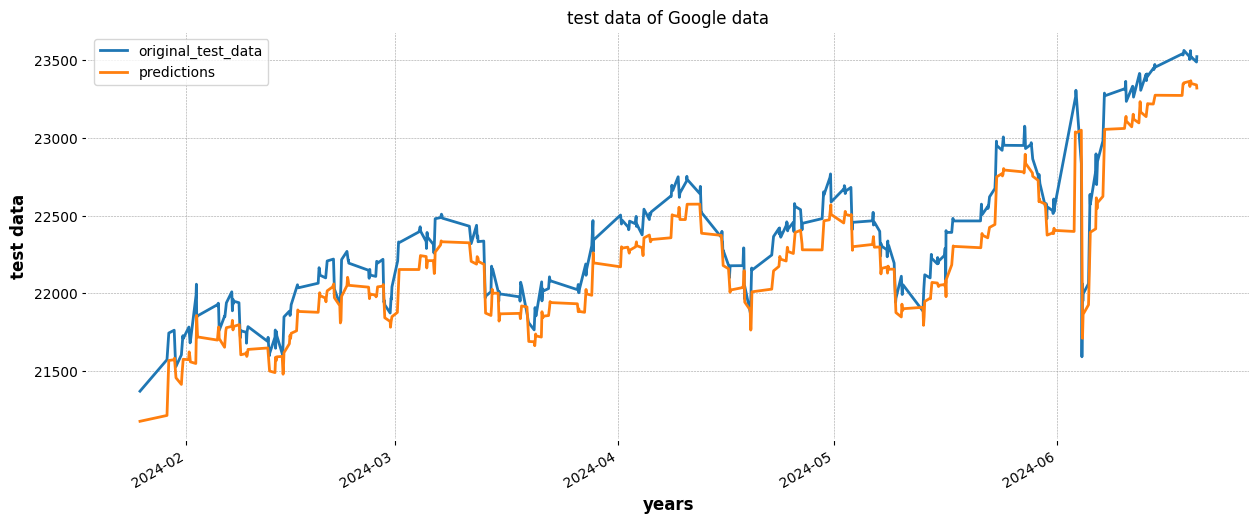

In [ ]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

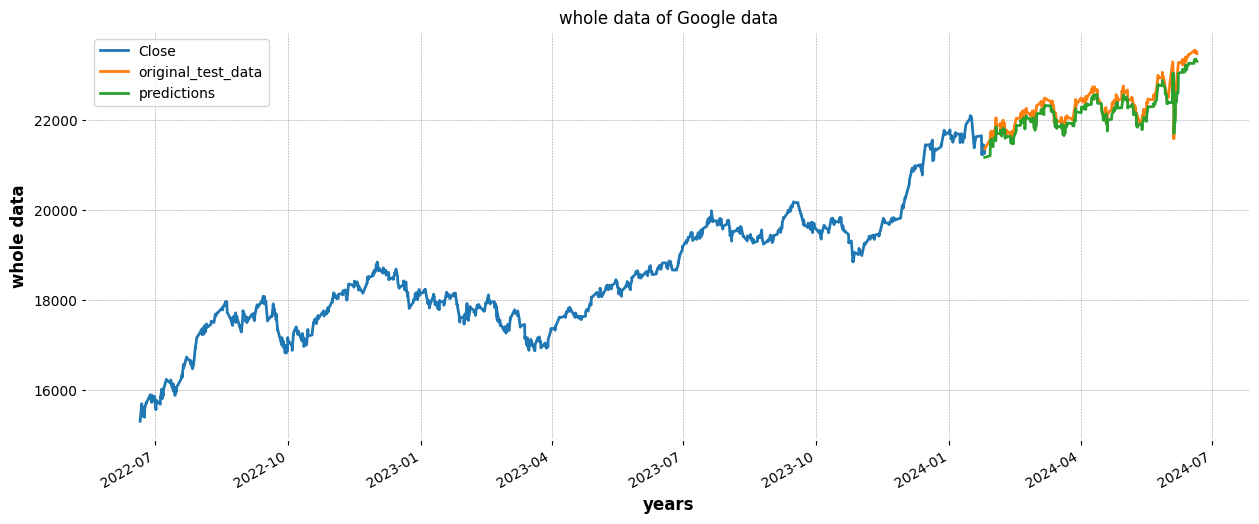

In [ ]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [ ]:
new_data = df.filter(['Adj Close'])
last_60_days = new_data[-100:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


(1, 100, 1)

In [ ]:
# prompt: predict next days price
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 56ms/step
[[23324.723]]


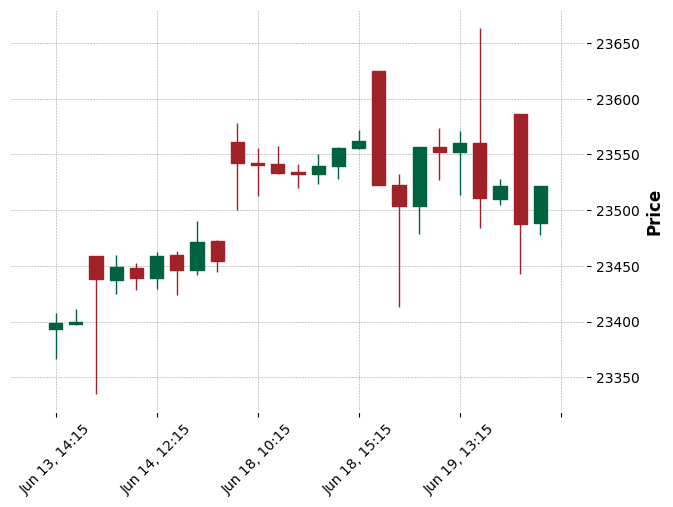

In [ ]:
mpf.plot(df.iloc[-25:,:],type='candle',style='charles')